In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from ipywidgets import interact
from keras import optimizers

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [5]:
import tensorflow as tf

## Data
This is a dataset of Devanagari Script Characters. It comprises of 92000 images [32x32 px] corresponding to 46 characters, consonants "ka" to "gya", and the digits 0 to 9. The vowels are missing.
The CSV file is of the dimensions 92000x1025. There are 1024 input features of pixel values in grayscale (0 to 255). The column "character" represents the Devanagari Character Name corresponding to each image.

In [2]:
df = pd.read_csv('E:\Devangri_Script/data.csv') 
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [6]:
X, Y = df[df.columns[:-1]], df[[df.columns[-1]]] # splitting the data into X and Y
X = X.astype('float64') # count
X = X/255 # Normalising the input (getting pixel intensity values in 0-1 range)
Y = pd.get_dummies(Y) # converting the output variable into categorical variable
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.20) # splitting the data into train and test sets.

#unittests
# Verifying the data is normalised.
assert X.max().max() == 1
assert X.min().min() == 0
# Verifying there are only 46 columns in output variable
assert len(Y.columns) == 46

In [7]:
model = Sequential() # The Sequential model is a linear stack of layers.
model.add(Dense(512, input_dim = 1024, activation = 'relu')) # 1st densely-connected NN layers with 1024 input layers and 512 output layers.
model.add(Dense(256, input_dim = 512, activation = 'relu')) # 2nd densely-connected NN layers with 512 input layers and 256 output layers.
model.add(Dense(46, input_dim = 256, activation = 'sigmoid')) # 3rd densely-connected NN layers with 256 input layers and 46 output layers.
sgd = tf.keras.optimizers.SGD(learning_rate=0.03) # defining our stochastic gradient descent optimizer.
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
log = model.fit(train_X, train_Y, epochs=4, batch_size=10)
train_accuracy = model.evaluate(train_X, train_Y)
test_accuracy = model.evaluate(train_X, train_Y)
print('Train Accuracy: ' + str(train_accuracy) + '\nTest Accuracy: ' + str(test_accuracy)) # Train Accuracy: [0.21497501897790294, 0.9359855055809021], Test Accuracy: [0.21497501897790294, 0.9359855055809021]

Epoch 1/4
7360/7360 [==============================] - 60s 7ms/step - loss: 0.9094 - accuracy: 0.7477
Epoch 2/4
7360/7360 [==============================] - 34s 5ms/step - loss: 0.3361 - accuracy: 0.9016
Epoch 3/4
7360/7360 [==============================] - 37s 5ms/step - loss: 0.2040 - accuracy: 0.9383
Epoch 4/4
2300/2300 [==============================] - 13s 3ms/step - loss: 0.0899 - accuracy: 0.9748
Train Accuracy: [0.0899195596575737, 0.9747825860977173]
Test Accuracy: [0.0899195596575737, 0.9747825860977173]


Text(0.5, 1.0, 'Model Accuracy')

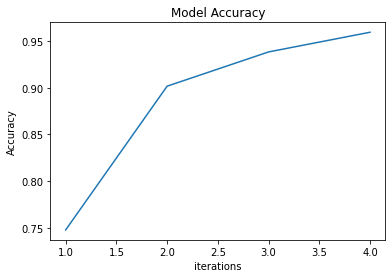

In [8]:
# plotting the accuracy over the epochs
plt.plot([1,2,3,4], log.history['accuracy'])
plt.xlabel('iterations')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

Text(0, 0.5, 'Loss')

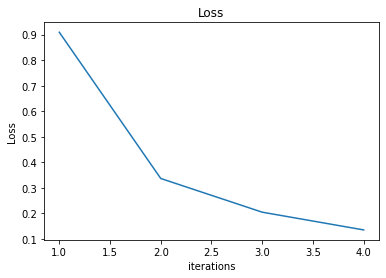

In [9]:
#plotting the accuracy over the epochs
plt.plot([1,2,3,4], log.history['loss'])
plt.title('Loss')
plt.xlabel('iterations')
plt.ylabel('Loss')

We have a 3-layer Neural Network with 512 units in Layer1, 256 units in Layer2 and 46 units in output layer (equal to the number of output classes). The model gives ~97.2% accuracy on testset of 13400 records.

'character_character_07_chha'

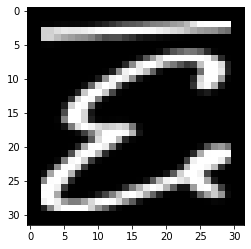

In [10]:
#sample output
plt.imshow((test_X.iloc[1995]).to_numpy().reshape(32,32), cmap = 'gray')
prediction = model.predict(test_X.iloc[[1995]])
test_Y.columns[np.argmax(prediction)]

In [11]:
#code to interactively loop through all the test examples and print their pridections.
@interact (digit = (0,16400))
def show_image(digit):
    plt.imshow((test_X.iloc[digit]).to_numpy().reshape(32,32), cmap = 'gray')
    prediction = model.predict(test_X.iloc[[digit]])
    prediction_prob = test_Y.columns[np.argmax(prediction)]
    print('Prediction: ' + prediction_prob + ', Probability: ' + str(max(max(prediction))))

interactive(children=(IntSlider(value=8200, description='digit', max=16400), Output()), _dom_classes=('widget-…

The model is converged with >97% accuracy and very good at predicting the Devanagari Characters.

# END